In [ ]:
import google.colab as uploaded
uploaded = uploaded.files.upload()



Saving tesla_stock_data_2000_2025.csv to tesla_stock_data_2000_2025.csv


In [ ]:
import pandas as pd
import os

def read_csv_file(file_path, chunksize=100000):
    """
    Reads a CSV file in chunks (useful for large files).
    Returns the combined DataFrame.
    """
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return None

    try:
        total_data = pd.DataFrame()
        print(f"📄 Reading file in chunks of {chunksize} rows...")

        for chunk in pd.read_csv(file_path, chunksize=chunksize):
            total_data = pd.concat([total_data, chunk], ignore_index=True)

        print(f"✅ File read successfully. Total rows: {len(total_data)}")
        return total_data

    except pd.errors.EmptyDataError:
        print("⚠️ The file is empty.")
    except pd.errors.ParserError:
        print("⚠️ Error parsing the file.")
    except Exception as e:
        print(f"⚠️ An unexpected error occurred: {e}")

    return None

# Example usage
if __name__ == "__main__":
    file_path = "tesla_stock_data_2000_2025.csv"
    df = read_csv_file(file_path)

    if df is not None:
        print("📊 First few rows of the dataset:")
        print(df.head())


📄 Reading file in chunks of 100000 rows...
✅ File read successfully. Total rows: 3694
📊 First few rows of the dataset:
        Price               Close                High                 Low  \
0      Ticker                TSLA                TSLA                TSLA   
1        Date                 NaN                 NaN                 NaN   
2  2010-06-29  1.5926669836044312  1.6666669845581055  1.1693329811096191   
3  2010-06-30  1.5886670351028442  2.0280001163482666   1.553333044052124   
4  2010-07-01  1.4639999866485596  1.7280000448226929  1.3513330221176147   

                 Open     Volume  
0                TSLA       TSLA  
1                 NaN        NaN  
2  1.2666670083999634  281494500  
3  1.7193330526351929  257806500  
4  1.6666669845581055  123282000  


In [ ]:
import pandas as pd
import os

def read_csv_file(file_path, chunksize=100000):
    """
    Reads a CSV file in chunks and returns a combined DataFrame.
    """
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return None

    try:
        total_data = pd.DataFrame()
        print(f"📄 Reading file in chunks of {chunksize} rows...")

        for chunk in pd.read_csv(file_path, chunksize=chunksize):
            total_data = pd.concat([total_data, chunk], ignore_index=True)

        print(f"✅ File read successfully. Total rows: {len(total_data)}")
        return total_data

    except pd.errors.EmptyDataError:
        print("⚠️ The file is empty.")
    except pd.errors.ParserError:
        print("⚠️ Error parsing the file.")
    except Exception as e:
        print(f"⚠️ An unexpected error occurred: {e}")

    return None


def preprocess_data(df):
    """
    Cleans and preprocesses the stock DataFrame.
    """
    print("🔧 Preprocessing data...")
    df = df.copy()

    # Use 'Price' as the date column if 'Date' is missing
    date_column = 'Date'
    if 'Date' not in df.columns:
        if 'Price' in df.columns:
            date_column = 'Price'
        else:
            raise KeyError("No suitable date column found in the DataFrame.")

    # Convert the date column to datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df = df.dropna(subset=[date_column])
    df = df.sort_values(by=date_column).reset_index(drop=True)

    # Rename to 'Date' for consistency
    if date_column != 'Date':
        df.rename(columns={date_column: 'Date'}, inplace=True)

    # Ensure numeric columns
    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"⚠️ Column '{col}' not found. Filling with NaNs.")
            df[col] = float('nan')

    df = df.dropna(subset=numeric_cols)

    print(f"✅ Preprocessing complete. Shape: {df.shape}")
    return df


def calculate_daily_returns(df):
    """
    Adds a column for daily return.
    """
    df['Daily Return'] = df['Close'].pct_change()
    return df


def calculate_moving_average(df, window=20):
    """
    Adds a column for moving average.
    """
    df[f'MA_{window}'] = df['Close'].rolling(window=window).mean()
    return df


def calculate_volatility(df, window=20):
    """
    Adds a column for rolling volatility.
    """
    df[f'Volatility_{window}'] = df['Daily Return'].rolling(window=window).std()
    return df


# ------------------------ Main Script ------------------------

if __name__ == "__main__":
    file_path = "tesla_stock_data_2000_2025.csv"

    # Step 1: Read CSV
    df = read_csv_file(file_path)

    if df is not None:
        # Step 2: Preprocess
        df = preprocess_data(df)

        # Step 3: Calculations
        df = calculate_daily_returns(df)
        df = calculate_moving_average(df, window=20)
        df = calculate_volatility(df, window=20)

        # Step 4: Display
        print("\n📊 Processed data (last 5 rows):")
        print(df[['Date', 'Close', 'Daily Return', 'MA_20', 'Volatility_20']].tail())

        # Optional: Export to new CSV
        df.to_csv("processed_tesla_stock_data.csv", index=False)
        print("\n💾 Processed data saved to 'processed_tesla_stock_data.csv'")


📄 Reading file in chunks of 100000 rows...
✅ File read successfully. Total rows: 3694
🔧 Preprocessing data...
✅ Preprocessing complete. Shape: (3692, 6)

📊 Processed data (last 5 rows):
           Date       Close  Daily Return       MA_20  Volatility_20
3687 2025-02-25  302.799988     -0.083896  362.489499       0.034820
3688 2025-02-26  290.799988     -0.039630  357.124998       0.035117
3689 2025-02-27  281.950012     -0.030433  351.767499       0.035250
3690 2025-02-28  292.980011      0.039120  346.402499       0.036003
3691 2025-03-03  302.339996      0.031948  341.289499       0.037090

💾 Processed data saved to 'processed_tesla_stock_data.csv'


<ipython-input-14-c8804f19243d>:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def prepare_features(df):
    """
    Creates features and target variable for regression.
    The target is the next day's 'Close' price.
    """
    df = df.copy()

    # Sort by date just in case
    df = df.sort_values('Date').reset_index(drop=True)

    # Shift Close to get next day's Close as the label
    df['Next_Close'] = df['Close'].shift(-1)

    # Drop last row with NaN in label
    df = df.dropna(subset=['Next_Close'])

    # Features
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    X = df[features]
    y = df['Next_Close']

    return X, y


def train_model(X, y):
    """
    Splits data, trains a regression model, and evaluates performance.
    """
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Model Performance:")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 R² Score: {r2:.4f}")

    return model


# ------------------------ Main ------------------------

if __name__ == "__main__":
    # Load preprocessed data (from previous script)
    file_path = "processed_tesla_stock_data.csv"
    df = pd.read_csv(file_path)

    # Step 1: Prepare features and target
    X, y = prepare_features(df)

    # Step 2: Train and evaluate the model
    model = train_model(X, y)



📈 Model Performance:
🔹 RMSE: 5.3824
🔹 R² Score: 0.9978



📈 Model Evaluation:
🔹 RMSE: 5.3824
🔹 R² Score: 0.9978

📊 Sample Predictions:
   Actual Close  Predicted Close
0          1.77             1.83
1        221.10           222.32
2          1.86             1.90
3         15.38            16.29
4         12.89            12.89
5        294.36           293.27
6          1.90             1.89
7         21.68            21.67
8         13.69            13.45
9         16.70            17.97


<ipython-input-16-eea4a7836704>:62: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-eea4a7836704>:62: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


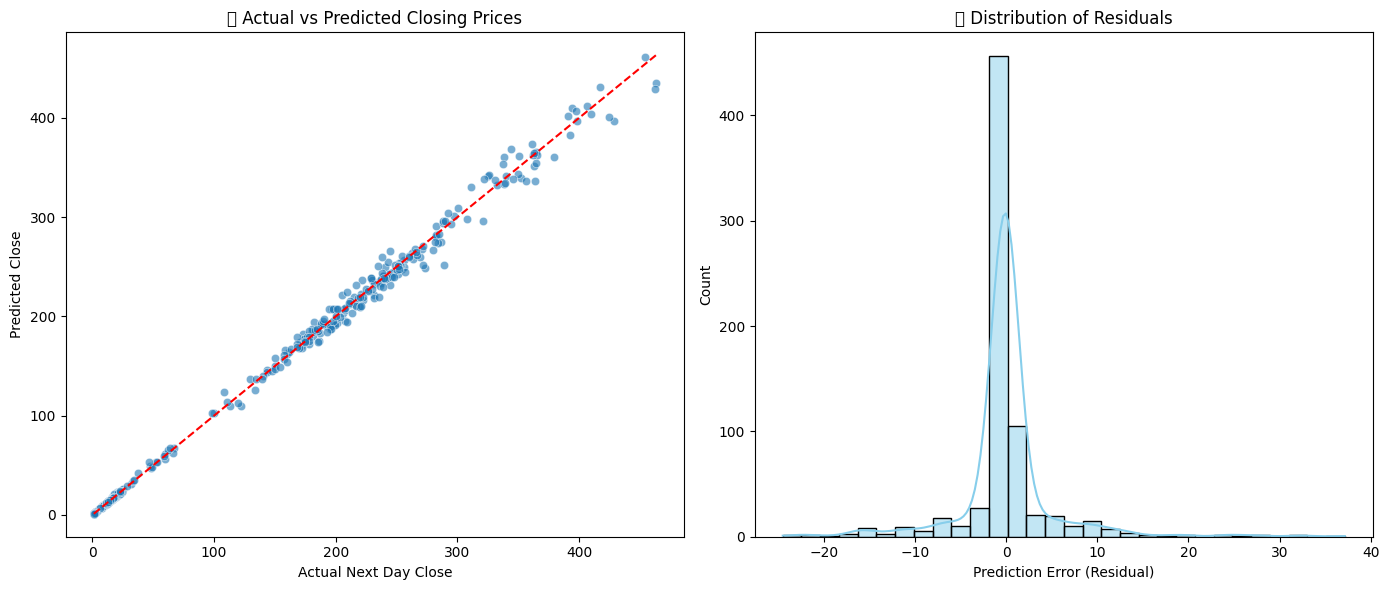

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def prepare_features(df):
    """
    Prepare features and labels for regression.
    """
    df = df.sort_values('Date').reset_index(drop=True)
    df['Next_Close'] = df['Close'].shift(-1)
    df = df.dropna(subset=['Next_Close'])

    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    X = df[features]
    y = df['Next_Close']

    return X, y, df

def train_model(X, y):
    """
    Train linear regression model and return evaluation data.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Model Evaluation:")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 R² Score: {r2:.4f}")

    return model, X_test, y_test, y_pred

def plot_results(y_test, y_pred):
    """
    Visualizes actual vs predicted and residuals.
    """
    plt.figure(figsize=(14, 6))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual Next Day Close")
    plt.ylabel("Predicted Close")
    plt.title("🔍 Actual vs Predicted Closing Prices")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

    # Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30, color='skyblue')
    plt.xlabel("Prediction Error (Residual)")
    plt.title("📉 Distribution of Residuals")

    plt.tight_layout()
    plt.show()

def show_prediction_table(y_test, y_pred):
    """
    Displays a sample table of predictions.
    """
    results_df = pd.DataFrame({
        "Actual Close": y_test.values,
        "Predicted Close": y_pred
    })
    print("\n📊 Sample Predictions:")
    print(results_df.head(10).round(2))

# ------------------------ Main ------------------------

if __name__ == "__main__":
    file_path = "processed_tesla_stock_data.csv"
    df = pd.read_csv(file_path)

    X, y, processed_df = prepare_features(df)
    model, X_test, y_test, y_pred = train_model(X, y)

    show_prediction_table(y_test, y_pred)
    plot_results(y_test, y_pred)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ----- Functions from earlier steps -----

def read_csv_file(file_path, chunksize=100000):
    if not os.path.exists(file_path):
        print("❌ File not found.")
        return None
    df = pd.concat(pd.read_csv(file_path, chunksize=chunksize), ignore_index=True)
    return df

def preprocess_data(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Price'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    df.rename(columns={'Price': 'Date'}, inplace=True)

    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=numeric_cols)
    return df

def prepare_features(df):
    df = df.copy()
    df['Next_Close'] = df['Close'].shift(-1)
    df = df.dropna()
    X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = df['Next_Close']
    return X, y, df

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Model Evaluation:")
    print(f"🔹 RMSE: {rmse:.2f}")
    print(f"🔹 R² Score: {r2:.4f}")
    return model, X_test, y_test, y_pred

def show_prediction_table(y_test, y_pred):
    df_result = pd.DataFrame({
        "Actual Close": y_test.values,
        "Predicted Close": y_pred
    })
    print("\n📊 Sample Predictions:")
    print(df_result.head(10).round(2))

def plot_results(y_test, y_pred):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")

    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30, color='skyblue')
    plt.title("Prediction Error (Residuals)")
    plt.tight_layout()
    plt.show()

# ----- Command-line Interface -----

def main():
    df = None
    processed_df = None
    model = None
    X, y = None, None

    while True:
        print("\n🔧 Tesla Stock Analysis CLI")
        print("1. Load data")
        print("2. Preprocess data")
        print("3. Train model")
        print("4. Show predictions")
        print("5. Plot results")
        print("0. Exit")

        choice = input("👉 Choose an option: ")

        if choice == '1':
            path = input("Enter path to CSV file: ")
            df = read_csv_file(path)
            if df is not None:
                print("✅ Data loaded.")
        elif choice == '2':
            if df is not None:
                processed_df = preprocess_data(df)
                X, y, _ = prepare_features(processed_df)
                print("✅ Data preprocessed.")
            else:
                print("⚠️ Load the data first.")
        elif choice == '3':
            if X is not None and y is not None:
                model, X_test, y_test, y_pred = train_model(X, y)
            else:
                print("⚠️ Preprocess the data first.")
        elif choice == '4':
            if model is not None:
                show_prediction_table(y_test, y_pred)
            else:
                print("⚠️ Train the model first.")
        elif choice == '5':
            if model is not None:
                plot_results(y_test, y_pred)
            else:
                print("⚠️ Train the model first.")
        elif choice == '0':
            print("👋 Exiting program.")
            break
        else:
            print("❌ Invalid choice. Try again.")

if __name__ == "__main__":
    main()



🔧 Tesla Stock Analysis CLI
1. Load data
2. Preprocess data
3. Train model
4. Show predictions
5. Plot results
0. Exit
👉 Choose an option: 0
👋 Exiting program.


In [ ]:
"""
Tesla Stock Analysis CLI Application

This command-line tool allows users to:
- Load Tesla stock data from a CSV file
- Preprocess and clean the data
- Train a regression model to predict the next day's closing price
- Evaluate model performance
- View predictions and visualize results

Author: [Your Name]
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# ----------------------------- USER GUIDE -----------------------------

def show_user_guide():
    """
    Display usage instructions and requirements.
    """
    print("""
📘 USER GUIDE: Tesla Stock Analysis CLI
---------------------------------------
Requirements:
- Python 3.x
- Install packages: pandas, numpy, matplotlib, seaborn, scikit-learn

To install dependencies, run:
    pip install pandas numpy matplotlib seaborn scikit-learn

How to Use:
1. Choose [1] to load your Tesla stock CSV file
2. Choose [2] to preprocess the data
3. Choose [3] to train a Linear Regression model
4. Choose [4] to view a table of predictions
5. Choose [5] to plot results (Actual vs Predicted, Residuals)
6. Choose [0] to exit the program

Ensure your CSV file contains columns like: Date, Open, High, Low, Close, Volume

💡 Pro Tip: Use cleaned data for best results!
    """)


# --------------------------- CORE FUNCTIONS ---------------------------

def read_csv_file(file_path, chunksize=100000):
    """
    Load CSV data in chunks and return combined DataFrame.

    Parameters:
        file_path (str): Path to CSV file
        chunksize (int): Number of rows to read per chunk

    Returns:
        pd.DataFrame: Loaded data
    """
    if not os.path.exists(file_path):
        print("❌ File not found.")
        return None
    df = pd.concat(pd.read_csv(file_path, chunksize=chunksize), ignore_index=True)
    return df


def preprocess_data(df):
    """
    Clean and prepare the DataFrame.

    Parameters:
        df (pd.DataFrame): Raw data

    Returns:
        pd.DataFrame: Cleaned data
    """
    df = df.copy()

    # Detect and convert Date column
    if 'Date' not in df.columns:
        if 'Price Date' in df.columns:
            df.rename(columns={'Price Date': 'Date'}, inplace=True)
        else:
            raise ValueError("Missing 'Date' column in CSV")

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df = df.sort_values('Date').reset_index(drop=True)

    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=numeric_cols)

    return df


def prepare_features(df):
    """
    Create feature set (X) and label set (y) for prediction.

    Parameters:
        df (pd.DataFrame): Cleaned data

    Returns:
        tuple: X (features), y (target), df (with target)
    """
    df = df.copy()
    df['Next_Close'] = df['Close'].shift(-1)
    df = df.dropna()

    X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = df['Next_Close']
    return X, y, df


def train_model(X, y):
    """
    Train a linear regression model.

    Parameters:
        X (pd.DataFrame): Features
        y (pd.Series): Labels

    Returns:
        tuple: trained model, test features, true labels, predictions
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Model Evaluation:")
    print(f"🔹 RMSE: {rmse:.2f}")
    print(f"🔹 R² Score: {r2:.4f}")
    return model, X_test, y_test, y_pred


def show_prediction_table(y_test, y_pred):
    """
    Print a sample of actual vs predicted values.
    """
    df_result = pd.DataFrame({
        "Actual Close": y_test.values,
        "Predicted Close": y_pred
    })
    print("\n📊 Sample Predictions:")
    print(df_result.head(10).round(2))


def plot_results(y_test, y_pred):
    """
    Show visual comparisons using Matplotlib/Seaborn.
    """
    plt.figure(figsize=(14, 6))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")

    # Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30, color='skyblue')
    plt.title("Prediction Error (Residuals)")
    plt.tight_layout()
    plt.show()


# ------------------------- MAIN CLI PROGRAM -------------------------

def main():
    """
    Main CLI interface to interact with the user.
    """
    show_user_guide()

    df = None
    processed_df = None
    model = None
    X, y = None, None

    while True:
        print("\n🔧 Tesla Stock Analysis CLI")
        print("1. Load data")
        print("2. Preprocess data")
        print("3. Train model")
        print("4. Show predictions")
        print("5. Plot results")
        print("0. Exit")

        choice = input("👉 Choose an option: ")

        if choice == '1':
            path = input("Enter path to CSV file: ")
            df = read_csv_file(path)
            if df is not None:
                print("✅ Data loaded.")
        elif choice == '2':
            if df is not None:
                try:
                    processed_df = preprocess_data(df)
                    X, y, _ = prepare_features(processed_df)
                    print("✅ Data preprocessed.")
                except Exception as e:
                    print(f"❌ Preprocessing failed: {e}")
            else:
                print("⚠️ Load the data first.")
        elif choice == '3':
            if X is not None and y is not None:
                model, X_test, y_test, y_pred = train_model(X, y)
            else:
                print("⚠️ Preprocess the data first.")
        elif choice == '4':
            if model is not None:
                show_prediction_table(y_test, y_pred)
            else:
                print("⚠️ Train the model first.")
        elif choice == '5':
            if model is not None:
                plot_results(y_test, y_pred)
            else:
                print("⚠️ Train the model first.")
        elif choice == '0':
            print("👋 Exiting program.")
            break
        else:
            print("❌ Invalid choice. Try again.")


# ----------------------------- ENTRY POINT -----------------------------

if __name__ == "__main__":
    main()



📘 USER GUIDE: Tesla Stock Analysis CLI
---------------------------------------
Requirements:
- Python 3.x
- Install packages: pandas, numpy, matplotlib, seaborn, scikit-learn

To install dependencies, run:
    pip install pandas numpy matplotlib seaborn scikit-learn

How to Use:
1. Choose [1] to load your Tesla stock CSV file
2. Choose [2] to preprocess the data
3. Choose [3] to train a Linear Regression model
4. Choose [4] to view a table of predictions
5. Choose [5] to plot results (Actual vs Predicted, Residuals)
6. Choose [0] to exit the program

Ensure your CSV file contains columns like: Date, Open, High, Low, Close, Volume

💡 Pro Tip: Use cleaned data for best results!
    

🔧 Tesla Stock Analysis CLI
1. Load data
2. Preprocess data
3. Train model
4. Show predictions
5. Plot results
0. Exit
👉 Choose an option: 0
👋 Exiting program.
